In [1]:
import networkx as nx         #pacchetto per reti
import numpy as np
import ipyparallel as ipp     #pacchetto per parallelizzazione
import time as clock
import matplotlib.pyplot as plt
from scipy import stats
from scipy import optimize
import pickle
#import winsound
from Node import *            #pacchetto agente Node
from NetworkTool import *     #pacchetto rete
from GenerativeTool import *  #pacchetto generazione rete
from VoteTool import *        #pacchetto analisi voto
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def Core(MG, Nodes, NodesA, FB, VB, RndFr, fbpos, fbdist,vbpos, vbdist, LayerA, LayerC, TheTime):
     
    for i in range(Nodes):
        tfix=list(-2*np.random.random(FB)+1)
        tvar=list(-2*np.random.random(VB)+1)
        MG.add_node(Node(MG.number_of_nodes(),tfix,tvar, np.random.random(),TheTime)) #create nodes with FB fix belief and VB var beli
        
    TheTime=TheTime+1

    for i in range(MG.number_of_nodes()):
        tlay = np.random.randint(LayerC)
        MG.nodes()[i].aggF(TheTime)
        AttachFriendFirst(MG, MG.nodes()[i], np.random.randint(RndFr)+1, tlay, fbpos[tlay], fbdist[tlay], vbpos[tlay], vbdist[tlay],TheTime) #every node search for friends
    print(' Time ', TheTime)

In [3]:
def Grow(MG, Nodes, NodesA, FB, VB, RndFr, fbpos, fbdist,vbpos, vbdist, LayerA, LayerC, TheTime):
    for j in range(Iter): #creating and adding
        TheTime = TheTime+1
        LayerB = ((LayerA-LayerC)//(Iter-1))*j + LayerC
        NodesB = NodesA//Iter
        print('Iter ',j,' Layers ', LayerB, ' Time ', TheTime)
        for i in range(NodesB):
            tfix=list(-2*np.random.random(FB)+1)
            tvar=list(-2*np.random.random(VB)+1)
            tnew = Node(MG.number_of_nodes(), tfix, tvar, np.random.random(), TheTime) #create nodes with FB fix belief and VB var belief
            MG.add_node(tnew) 
            tnew.aggF(TheTime)
            tlay = np.random.randint(LayerB)
            AttachChoosenBelief(MG, tnew, np.random.randint(RndFr)+1, tlay, fbpos[tlay], fbdist[tlay], vbpos[tlay], vbdist[tlay], TheTime)

    print(MG.number_of_nodes())
    print(' Time ', TheTime)

In [4]:
def Rand(MG, Nodes, NodesA, FB, VB, RndFr, fbpos, fbdist,vbpos, vbdist, LayerA, LayerC, TheTime):
    TheTime=TheTime+1 
    co=0
    while MG.number_of_nodes()<NodesA:
        tfix=list(-2*np.random.random(FB)+1)
        tvar=list(-2*np.random.random(VB)+1)
        tnew = Node(MG.number_of_nodes(), tfix, tvar, np.random.random(), TheTime) #create nodes with FB fix belief and VB var belief
        MG.add_node(tnew) 
        tnew.aggF(TheTime)
        
    for i in MG.nodes():
        if len(MG.neighbors(i))==0:
            co=co+1
            RandomLink(MG, i, LayerA, TheTime)
    print("added: ",co,'; percentage: ', (co/MG.number_of_nodes())*100,'% ')
    print(' Time ', TheTime)
    return(co/MG.number_of_nodes())


 {'alay': {2000: [], 3000: [], 0.2: [], 500: [], 5: [], 8: [], 1000: [], 4: [], 10: [], 12: []}, 'proj': {2000: [], 3000: [], 0.2: [], 500: [], 5: [], 8: [], 1000: [], 4: [], 10: [], 12: []}}

 Repetition 0

 Setup 500 5 10 4 0.2
 Time  0

 [0.6793471910468101, 0.4254164326046309, 0.35971677293451, 0.385744972043739] 
 [[1, 3, 0, 3], [0, 2, 2, 3], [2], [1, 3]] 
 [0.45377420725405176, 0.4533960189724794, 0.42500837829666555, 0.2922214803367389] 
 [[4, 2, 9, 4, 8, 7], [8, 6], [7, 7, 3, 8, 9, 3], [9, 2, 6]] 
 [[6, 7], [6, 4, 8, 7, 3, 1, 6, 1], [9, 6, 2, 6, 5, 3], [0, 4, 1, 0, 8, 5, 1, 8, 3]]
 Time  1
Iter  0  Layers  2  Time  1
Iter  1  Layers  3  Time  2
Iter  2  Layers  4  Time  3
548
 Time  3
added:  90 ; percentage:  16.423357664233578 % 
 Time  1
0.16423357664233576
0
complete assortativity  0.0347207335542

Layer 0
assortativity  -0.0438596491228
clustering  0.0
averagedegree  1.15254237288
nodes  118

Layer 1
assortativity  0.125581765384
clustering  0.04323418516966905
averagedeg

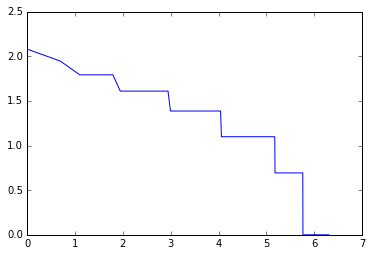


 {'alay': {2000: [], 3000: [], 0.2: [0.064241639111353319], 500: [0.064241639111353319], 5: [0.064241639111353319], 8: [], 1000: [], 4: [0.064241639111353319], 10: [0.064241639111353319], 12: []}, 'proj': {2000: [], 3000: [], 0.2: [0.14731627946452619], 500: [0.14731627946452619], 5: [0.14731627946452619], 8: [], 1000: [], 4: [0.14731627946452619], 10: [0.14731627946452619], 12: []}} 
 {'alay': {2000: [], 3000: [], 0.2: [-0.32249669309147005], 500: [-0.32249669309147005], 5: [-0.32249669309147005], 8: [], 1000: [], 4: [-0.32249669309147005], 10: [-0.32249669309147005], 12: []}, 'proj': {2000: [], 3000: [], 0.2: [-0.49015523309289694], 500: [-0.49015523309289694], 5: [-0.49015523309289694], 8: [], 1000: [], 4: [-0.49015523309289694], 10: [-0.49015523309289694], 12: []}} 
------------------------------------------

 Setup 500 5 10 8 0.2
 Time  0

 [0.3359381303577983, 0.24612236000211402, 0.4166906796588547, 0.6581595440825556, 0.2695676989236258, 0.5539289937055099, 0.4702255251715189,

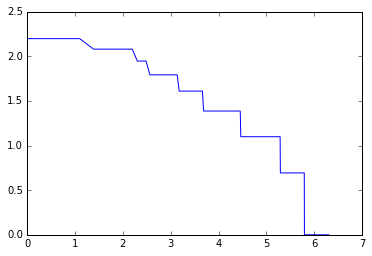


 {'alay': {2000: [], 3000: [], 0.2: [0.064241639111353319, 0.066322173301021456], 500: [0.064241639111353319, 0.066322173301021456], 5: [0.064241639111353319, 0.066322173301021456], 8: [0.066322173301021456], 1000: [], 4: [0.064241639111353319], 10: [0.064241639111353319, 0.066322173301021456], 12: []}, 'proj': {2000: [], 3000: [], 0.2: [0.14731627946452619, 0.13848086723522601], 500: [0.14731627946452619, 0.13848086723522601], 5: [0.14731627946452619, 0.13848086723522601], 8: [0.13848086723522601], 1000: [], 4: [0.14731627946452619], 10: [0.14731627946452619, 0.13848086723522601], 12: []}} 
 {'alay': {2000: [], 3000: [], 0.2: [-0.32249669309147005, -0.25400921909692359], 500: [-0.32249669309147005, -0.25400921909692359], 5: [-0.32249669309147005, -0.25400921909692359], 8: [-0.25400921909692359], 1000: [], 4: [-0.32249669309147005], 10: [-0.32249669309147005, -0.25400921909692359], 12: []}, 'proj': {2000: [], 3000: [], 0.2: [-0.49015523309289694, -0.55512256487300249], 500: [-0.490155

C:\Users\Francesco\Anaconda4\lib\site-packages\networkx\algorithms\assortativity\correlation.py:285: RuntimeWarning: invalid value encountered in double_scalars
  return (xy*(M-ab)).sum()/numpy.sqrt(vara*varb)


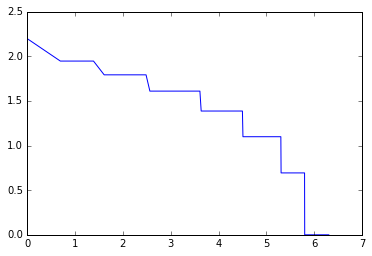

C:\Users\Francesco\Anaconda4\lib\site-packages\scipy\stats\stats.py:4354: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp
C:\Users\Francesco\Anaconda4\lib\site-packages\scipy\stats\_distn_infrastructure.py:1748: RuntimeWarning: invalid value encountered in greater
  cond1 = (scale > 0) & (x > self.a) & (x < self.b)
C:\Users\Francesco\Anaconda4\lib\site-packages\scipy\stats\_distn_infrastructure.py:1748: RuntimeWarning: invalid value encountered in less
  cond1 = (scale > 0) & (x > self.a) & (x < self.b)
C:\Users\Francesco\Anaconda4\lib\site-packages\scipy\stats\_distn_infrastructure.py:1749: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)



 {'alay': {2000: [], 3000: [], 0.2: [0.064241639111353319, 0.066322173301021456, nan], 500: [0.064241639111353319, 0.066322173301021456, nan], 5: [0.064241639111353319, 0.066322173301021456, nan], 8: [0.066322173301021456], 1000: [], 4: [0.064241639111353319], 10: [0.064241639111353319, 0.066322173301021456, nan], 12: [nan]}, 'proj': {2000: [], 3000: [], 0.2: [0.14731627946452619, 0.13848086723522601, 0.14977806759996665], 500: [0.14731627946452619, 0.13848086723522601, 0.14977806759996665], 5: [0.14731627946452619, 0.13848086723522601, 0.14977806759996665], 8: [0.13848086723522601], 1000: [], 4: [0.14731627946452619], 10: [0.14731627946452619, 0.13848086723522601, 0.14977806759996665], 12: [0.14977806759996665]}} 
 {'alay': {2000: [], 3000: [], 0.2: [-0.32249669309147005, -0.25400921909692359, -0.24361266805233664], 500: [-0.32249669309147005, -0.25400921909692359, -0.24361266805233664], 5: [-0.32249669309147005, -0.25400921909692359, -0.24361266805233664], 8: [-0.25400921909692359],

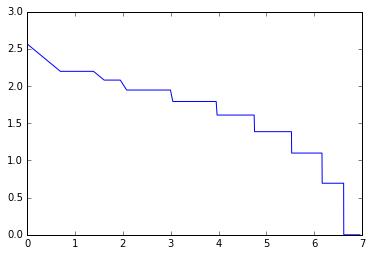


 {'alay': {2000: [], 3000: [], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603], 500: [0.064241639111353319, 0.066322173301021456, nan], 5: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603], 8: [0.066322173301021456], 1000: [0.091965000511249603], 4: [0.064241639111353319, 0.091965000511249603], 10: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603], 12: [nan]}, 'proj': {2000: [], 3000: [], 0.2: [0.14731627946452619, 0.13848086723522601, 0.14977806759996665, 0.14833220572750783], 500: [0.14731627946452619, 0.13848086723522601, 0.14977806759996665], 5: [0.14731627946452619, 0.13848086723522601, 0.14977806759996665, 0.14833220572750783], 8: [0.13848086723522601], 1000: [0.14833220572750783], 4: [0.14731627946452619, 0.14833220572750783], 10: [0.14731627946452619, 0.13848086723522601, 0.14977806759996665, 0.14833220572750783], 12: [0.14977806759996665]}} 
 {'alay': {2000: [], 3000: [], 0.2: [-0.32249669309147005, -0.2

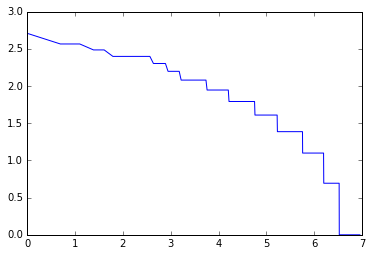


 {'alay': {2000: [], 3000: [], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan], 500: [0.064241639111353319, 0.066322173301021456, nan], 5: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan], 8: [0.066322173301021456, nan], 1000: [0.091965000511249603, nan], 4: [0.064241639111353319, 0.091965000511249603], 10: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan], 12: [nan]}, 'proj': {2000: [], 3000: [], 0.2: [0.14731627946452619, 0.13848086723522601, 0.14977806759996665, 0.14833220572750783, 0.15790131017944301], 500: [0.14731627946452619, 0.13848086723522601, 0.14977806759996665], 5: [0.14731627946452619, 0.13848086723522601, 0.14977806759996665, 0.14833220572750783, 0.15790131017944301], 8: [0.13848086723522601, 0.15790131017944301], 1000: [0.14833220572750783, 0.15790131017944301], 4: [0.14731627946452619, 0.14833220572750783], 10: [0.14731627946452619, 0.13848086723522601, 0.14977806759996665, 0.148

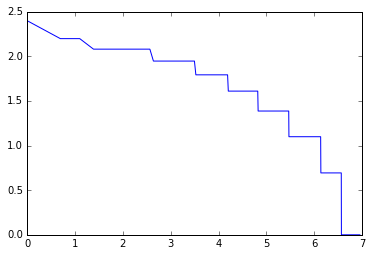


 {'alay': {2000: [], 3000: [], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan], 500: [0.064241639111353319, 0.066322173301021456, nan], 5: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan], 8: [0.066322173301021456, nan], 1000: [0.091965000511249603, nan, nan], 4: [0.064241639111353319, 0.091965000511249603], 10: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan], 12: [nan, nan]}, 'proj': {2000: [], 3000: [], 0.2: [0.14731627946452619, 0.13848086723522601, 0.14977806759996665, 0.14833220572750783, 0.15790131017944301, 0.15005521465451291], 500: [0.14731627946452619, 0.13848086723522601, 0.14977806759996665], 5: [0.14731627946452619, 0.13848086723522601, 0.14977806759996665, 0.14833220572750783, 0.15790131017944301, 0.15005521465451291], 8: [0.13848086723522601, 0.15790131017944301], 1000: [0.14833220572750783, 0.15790131017944301, 0.15005521465451291], 4: [0.14731627946452619, 0.14833

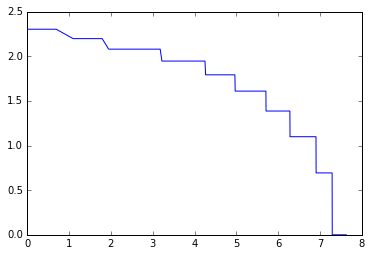


 {'alay': {2000: [0.093506118750335959], 3000: [], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959], 500: [0.064241639111353319, 0.066322173301021456, nan], 5: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959], 8: [0.066322173301021456, nan], 1000: [0.091965000511249603, nan, nan], 4: [0.064241639111353319, 0.091965000511249603, 0.093506118750335959], 10: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959], 12: [nan, nan]}, 'proj': {2000: [0.1545426863148758], 3000: [], 0.2: [0.14731627946452619, 0.13848086723522601, 0.14977806759996665, 0.14833220572750783, 0.15790131017944301, 0.15005521465451291, 0.1545426863148758], 500: [0.14731627946452619, 0.13848086723522601, 0.14977806759996665], 5: [0.14731627946452619, 0.13848086723522601, 0.14977806759996665, 0.14833220572750783, 0.15790131017944301, 0.15005521465451291, 0.154

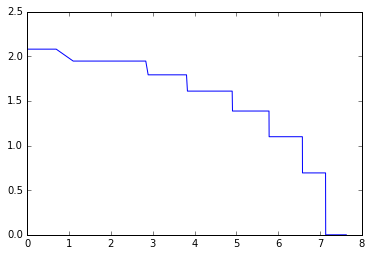


 {'alay': {2000: [0.093506118750335959, 0.064647275433856163], 3000: [], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163], 500: [0.064241639111353319, 0.066322173301021456, nan], 5: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163], 8: [0.066322173301021456, nan, 0.064647275433856163], 1000: [0.091965000511249603, nan, nan], 4: [0.064241639111353319, 0.091965000511249603, 0.093506118750335959], 10: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163], 12: [nan, nan]}, 'proj': {2000: [0.1545426863148758, 0.14786465381647279], 3000: [], 0.2: [0.14731627946452619, 0.13848086723522601, 0.14977806759996665, 0.14833220572750783, 0.15790131017944301, 0.15005521465451291, 0.1545426863148758, 0.14786465381647279], 500: [0.14731627946452619, 0.13848086723522601, 0.149

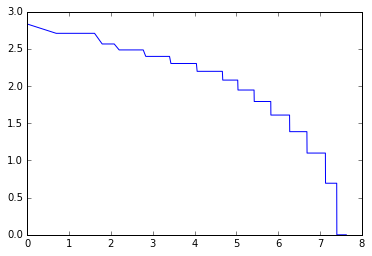


 {'alay': {2000: [0.093506118750335959, 0.064647275433856163, nan], 3000: [], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan], 500: [0.064241639111353319, 0.066322173301021456, nan], 5: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan], 8: [0.066322173301021456, nan, 0.064647275433856163], 1000: [0.091965000511249603, nan, nan], 4: [0.064241639111353319, 0.091965000511249603, 0.093506118750335959], 10: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan], 12: [nan, nan, nan]}, 'proj': {2000: [0.1545426863148758, 0.14786465381647279, 0.14215347094272149], 3000: [], 0.2: [0.14731627946452619, 0.13848086723522601, 0.14977806759996665, 0.14833220572750783, 0.15790131017944301, 0.15005521465451291, 0.1545426863148758, 0.14786465381647279, 0.142153

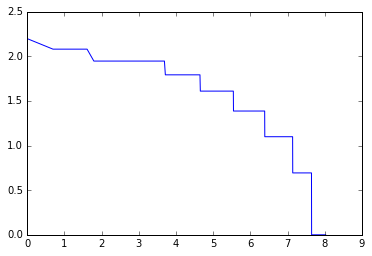


 {'alay': {2000: [0.093506118750335959, 0.064647275433856163, nan], 3000: [0.093475461226274259], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259], 500: [0.064241639111353319, 0.066322173301021456, nan], 5: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259], 8: [0.066322173301021456, nan, 0.064647275433856163], 1000: [0.091965000511249603, nan, nan], 4: [0.064241639111353319, 0.091965000511249603, 0.093506118750335959, 0.093475461226274259], 10: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259], 12: [nan, nan, nan]}, 'proj': {2000: [0.1545426863148758, 0.14786465381647279, 0.14215347094272149], 3000: [0.15029201334780742], 0.2: [0.14731627946452619, 0.13848086723522601, 0.1497

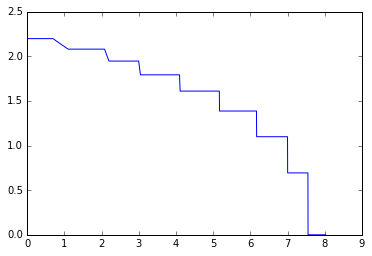


 {'alay': {2000: [0.093506118750335959, 0.064647275433856163, nan], 3000: [0.093475461226274259, 0.066855657072268107], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107], 500: [0.064241639111353319, 0.066322173301021456, nan], 5: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107], 8: [0.066322173301021456, nan, 0.064647275433856163, 0.066855657072268107], 1000: [0.091965000511249603, nan, nan], 4: [0.064241639111353319, 0.091965000511249603, 0.093506118750335959, 0.093475461226274259], 10: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107], 12: [nan, nan, nan]}, 'proj': {2000: [0.1545426863148758, 0.14786465381647

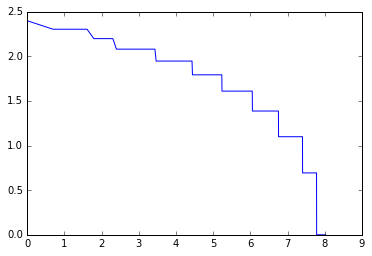


 {'alay': {2000: [0.093506118750335959, 0.064647275433856163, nan], 3000: [0.093475461226274259, 0.066855657072268107, 0.078034966845598616], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616], 500: [0.064241639111353319, 0.066322173301021456, nan], 5: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616], 8: [0.066322173301021456, nan, 0.064647275433856163, 0.066855657072268107], 1000: [0.091965000511249603, nan, nan], 4: [0.064241639111353319, 0.091965000511249603, 0.093506118750335959, 0.093475461226274259], 10: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.0780349

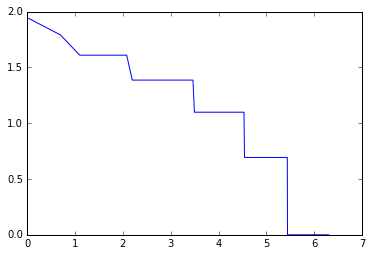


 {'alay': {2000: [0.093506118750335959, 0.064647275433856163, nan], 3000: [0.093475461226274259, 0.066855657072268107, 0.078034966845598616], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307], 500: [0.064241639111353319, 0.066322173301021456, nan, 0.05060868376710307], 5: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307], 8: [0.066322173301021456, nan, 0.064647275433856163, 0.066855657072268107], 1000: [0.091965000511249603, nan, nan], 4: [0.064241639111353319, 0.091965000511249603, 0.093506118750335959, 0.093475461226274259, 0.05060868376710307], 10: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.0935061187503359

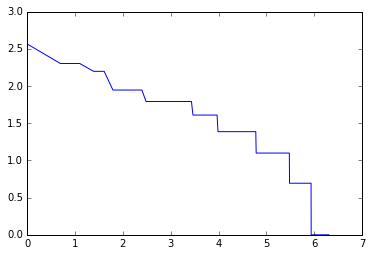


 {'alay': {2000: [0.093506118750335959, 0.064647275433856163, nan], 3000: [0.093475461226274259, 0.066855657072268107, 0.078034966845598616], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421], 500: [0.064241639111353319, 0.066322173301021456, nan, 0.05060868376710307, 0.067465111791736421], 5: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421], 8: [0.066322173301021456, nan, 0.064647275433856163, 0.066855657072268107, 0.067465111791736421], 1000: [0.091965000511249603, nan, nan], 4: [0.064241639111353319, 0.091965000511249603, 0.093506118750335959, 0.093475461226274259, 0.05060868376710307], 10: [0.064241639

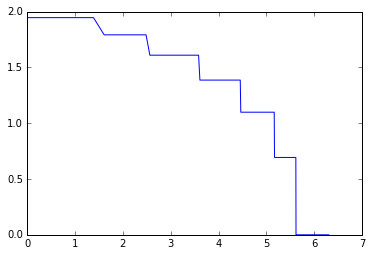


 {'alay': {2000: [0.093506118750335959, 0.064647275433856163, nan], 3000: [0.093475461226274259, 0.066855657072268107, 0.078034966845598616], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan], 500: [0.064241639111353319, 0.066322173301021456, nan, 0.05060868376710307, 0.067465111791736421, nan], 5: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan], 8: [0.066322173301021456, nan, 0.064647275433856163, 0.066855657072268107, 0.067465111791736421], 1000: [0.091965000511249603, nan, nan], 4: [0.064241639111353319, 0.091965000511249603, 0.093506118750335959, 0.093475461226274259, 0.05060868376710307], 1

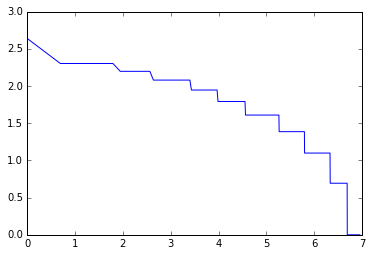


 {'alay': {2000: [0.093506118750335959, 0.064647275433856163, nan], 3000: [0.093475461226274259, 0.066855657072268107, 0.078034966845598616], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324], 500: [0.064241639111353319, 0.066322173301021456, nan, 0.05060868376710307, 0.067465111791736421, nan], 5: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324], 8: [0.066322173301021456, nan, 0.064647275433856163, 0.066855657072268107, 0.067465111791736421], 1000: [0.091965000511249603, nan, nan, 0.10143654026268324], 4: [0.064241639111353319, 0.091965000511249603, 0.09

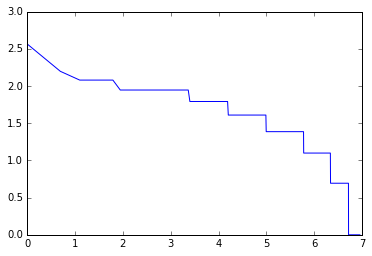


 {'alay': {2000: [0.093506118750335959, 0.064647275433856163, nan], 3000: [0.093475461226274259, 0.066855657072268107, 0.078034966845598616], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324, 0.086311422804494969], 500: [0.064241639111353319, 0.066322173301021456, nan, 0.05060868376710307, 0.067465111791736421, nan], 5: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324, 0.086311422804494969], 8: [0.066322173301021456, nan, 0.064647275433856163, 0.066855657072268107, 0.067465111791736421, 0.086311422804494969], 1000: [0.091965000511249603, nan, nan, 0.101436

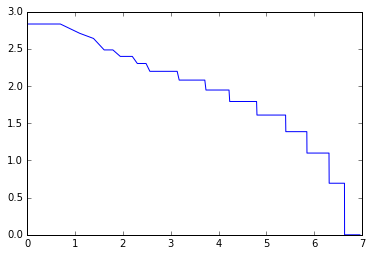


 {'alay': {2000: [0.093506118750335959, 0.064647275433856163, nan], 3000: [0.093475461226274259, 0.066855657072268107, 0.078034966845598616], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324, 0.086311422804494969, nan], 500: [0.064241639111353319, 0.066322173301021456, nan, 0.05060868376710307, 0.067465111791736421, nan], 5: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324, 0.086311422804494969, nan], 8: [0.066322173301021456, nan, 0.064647275433856163, 0.066855657072268107, 0.067465111791736421, 0.086311422804494969], 1000: [0.091965000511249603, nan, nan

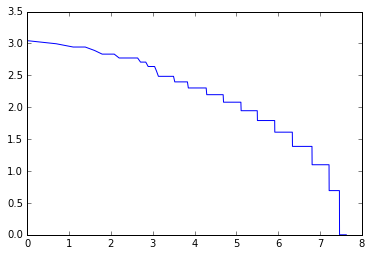


 {'alay': {2000: [0.093506118750335959, 0.064647275433856163, nan, 0.11206317136124136], 3000: [0.093475461226274259, 0.066855657072268107, 0.078034966845598616], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324, 0.086311422804494969, nan, 0.11206317136124136], 500: [0.064241639111353319, 0.066322173301021456, nan, 0.05060868376710307, 0.067465111791736421, nan], 5: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324, 0.086311422804494969, nan, 0.11206317136124136], 8: [0.066322173301021456, nan, 0.064647275433856163, 0.066855657072268107, 0.06746511179173642

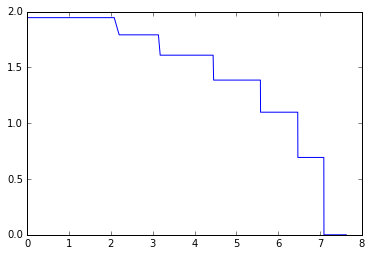


 {'alay': {2000: [0.093506118750335959, 0.064647275433856163, nan, 0.11206317136124136, 0.061646467492994725], 3000: [0.093475461226274259, 0.066855657072268107, 0.078034966845598616], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324, 0.086311422804494969, nan, 0.11206317136124136, 0.061646467492994725], 500: [0.064241639111353319, 0.066322173301021456, nan, 0.05060868376710307, 0.067465111791736421, nan], 5: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324, 0.086311422804494969, nan, 0.11206317136124136, 0.061646467492994725], 8: [0.066322173301021456, na

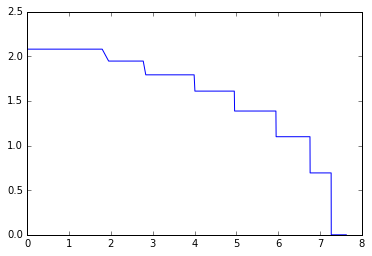


 {'alay': {2000: [0.093506118750335959, 0.064647275433856163, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758], 3000: [0.093475461226274259, 0.066855657072268107, 0.078034966845598616], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324, 0.086311422804494969, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758], 500: [0.064241639111353319, 0.066322173301021456, nan, 0.05060868376710307, 0.067465111791736421, nan], 5: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324, 0.086311422804494969, nan, 0.11206317136124136, 0.06164

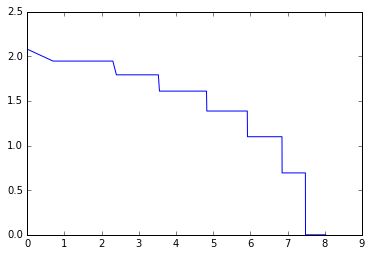


 {'alay': {2000: [0.093506118750335959, 0.064647275433856163, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758], 3000: [0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.075243143352601113], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324, 0.086311422804494969, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.075243143352601113], 500: [0.064241639111353319, 0.066322173301021456, nan, 0.05060868376710307, 0.067465111791736421, nan], 5: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324, 0.086311422

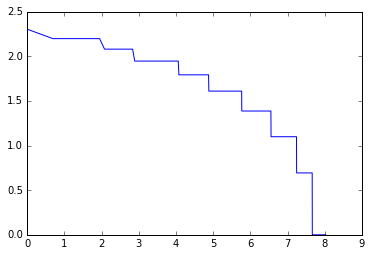


 {'alay': {2000: [0.093506118750335959, 0.064647275433856163, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758], 3000: [0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.075243143352601113, nan], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324, 0.086311422804494969, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.075243143352601113, nan], 500: [0.064241639111353319, 0.066322173301021456, nan, 0.05060868376710307, 0.067465111791736421, nan], 5: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324, 0

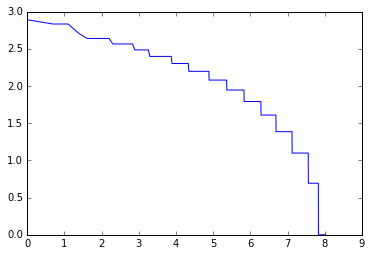


 {'alay': {2000: [0.093506118750335959, 0.064647275433856163, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758], 3000: [0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.075243143352601113, nan, nan], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324, 0.086311422804494969, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.075243143352601113, nan, nan], 500: [0.064241639111353319, 0.066322173301021456, nan, 0.05060868376710307, 0.067465111791736421, nan], 5: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.1014365402

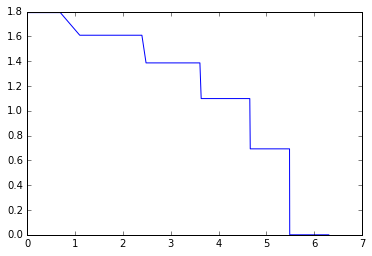


 {'alay': {2000: [0.093506118750335959, 0.064647275433856163, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758], 3000: [0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.075243143352601113, nan, nan], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324, 0.086311422804494969, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.075243143352601113, nan, nan, 0.054405054788021621], 500: [0.064241639111353319, 0.066322173301021456, nan, 0.05060868376710307, 0.067465111791736421, nan, 0.054405054788021621], 5: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710

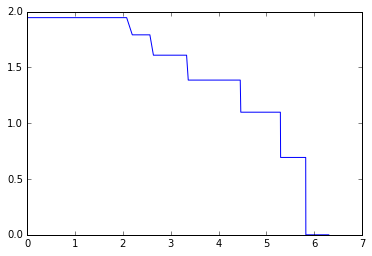


 {'alay': {2000: [0.093506118750335959, 0.064647275433856163, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758], 3000: [0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.075243143352601113, nan, nan], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324, 0.086311422804494969, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.075243143352601113, nan, nan, 0.054405054788021621, nan], 500: [0.064241639111353319, 0.066322173301021456, nan, 0.05060868376710307, 0.067465111791736421, nan, 0.054405054788021621, nan], 5: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.0506

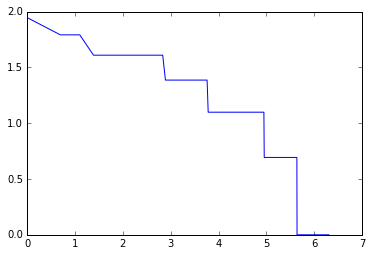


 {'alay': {2000: [0.093506118750335959, 0.064647275433856163, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758], 3000: [0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.075243143352601113, nan, nan], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324, 0.086311422804494969, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.075243143352601113, nan, nan, 0.054405054788021621, nan, nan], 500: [0.064241639111353319, 0.066322173301021456, nan, 0.05060868376710307, 0.067465111791736421, nan, 0.054405054788021621, nan, nan], 5: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.0780349668455986

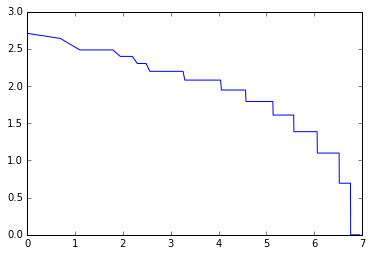


 {'alay': {2000: [0.093506118750335959, 0.064647275433856163, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758], 3000: [0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.075243143352601113, nan, nan], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324, 0.086311422804494969, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.075243143352601113, nan, nan, 0.054405054788021621, nan, nan, 0.11944614371477275], 500: [0.064241639111353319, 0.066322173301021456, nan, 0.05060868376710307, 0.067465111791736421, nan, 0.054405054788021621, nan, nan], 5: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.06685565707226810

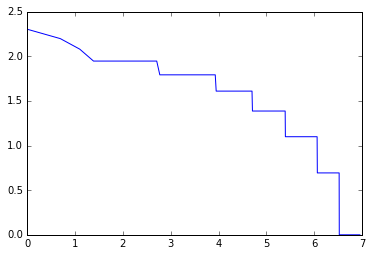


 {'alay': {2000: [0.093506118750335959, 0.064647275433856163, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758], 3000: [0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.075243143352601113, nan, nan], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324, 0.086311422804494969, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.075243143352601113, nan, nan, 0.054405054788021621, nan, nan, 0.11944614371477275, 0.071492875906702391], 500: [0.064241639111353319, 0.066322173301021456, nan, 0.05060868376710307, 0.067465111791736421, nan, 0.054405054788021621, nan, nan], 5: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.09347546122627425

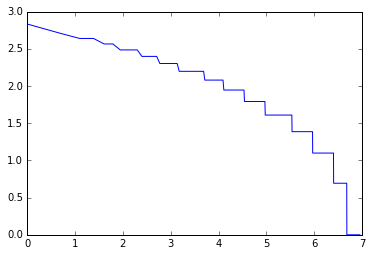


 {'alay': {2000: [0.093506118750335959, 0.064647275433856163, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758], 3000: [0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.075243143352601113, nan, nan], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324, 0.086311422804494969, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.075243143352601113, nan, nan, 0.054405054788021621, nan, nan, 0.11944614371477275, 0.071492875906702391, nan], 500: [0.064241639111353319, 0.066322173301021456, nan, 0.05060868376710307, 0.067465111791736421, nan, 0.054405054788021621, nan, nan], 5: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226

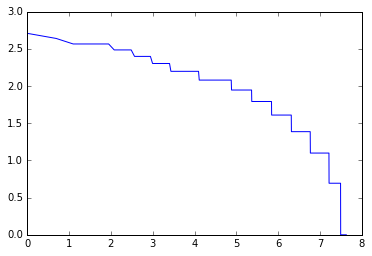


 {'alay': {2000: [0.093506118750335959, 0.064647275433856163, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.12781130925811027], 3000: [0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.075243143352601113, nan, nan], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324, 0.086311422804494969, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.075243143352601113, nan, nan, 0.054405054788021621, nan, nan, 0.11944614371477275, 0.071492875906702391, nan, 0.12781130925811027], 500: [0.064241639111353319, 0.066322173301021456, nan, 0.05060868376710307, 0.067465111791736421, nan, 0.054405054788021621, nan, nan], 5: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959,

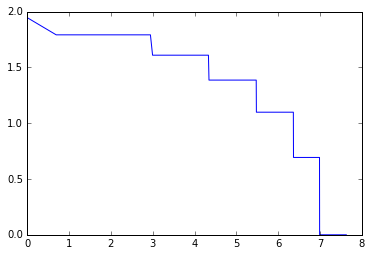


 {'alay': {2000: [0.093506118750335959, 0.064647275433856163, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.12781130925811027, nan], 3000: [0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.075243143352601113, nan, nan], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324, 0.086311422804494969, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.075243143352601113, nan, nan, 0.054405054788021621, nan, nan, 0.11944614371477275, 0.071492875906702391, nan, 0.12781130925811027, nan], 500: [0.064241639111353319, 0.066322173301021456, nan, 0.05060868376710307, 0.067465111791736421, nan, 0.054405054788021621, nan, nan], 5: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118

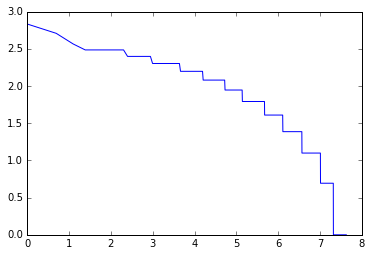


 {'alay': {2000: [0.093506118750335959, 0.064647275433856163, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.12781130925811027, nan, nan], 3000: [0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.075243143352601113, nan, nan], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324, 0.086311422804494969, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.075243143352601113, nan, nan, 0.054405054788021621, nan, nan, 0.11944614371477275, 0.071492875906702391, nan, 0.12781130925811027, nan, nan], 500: [0.064241639111353319, 0.066322173301021456, nan, 0.05060868376710307, 0.067465111791736421, nan, 0.054405054788021621, nan, nan], 5: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0

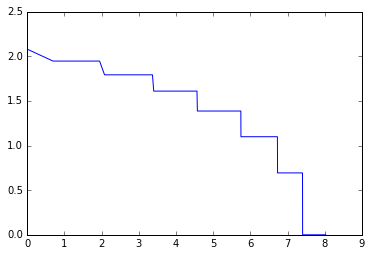


 {'alay': {2000: [0.093506118750335959, 0.064647275433856163, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.12781130925811027, nan, nan], 3000: [0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.075243143352601113, nan, nan, 0.068431850571794989], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324, 0.086311422804494969, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.075243143352601113, nan, nan, 0.054405054788021621, nan, nan, 0.11944614371477275, 0.071492875906702391, nan, 0.12781130925811027, nan, nan, 0.068431850571794989], 500: [0.064241639111353319, 0.066322173301021456, nan, 0.05060868376710307, 0.067465111791736421, nan, 0.054405054788021621, nan, nan], 5: [0.064241639111353319, 0.06632217330102

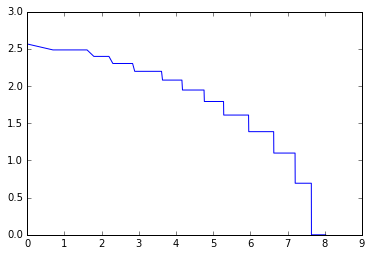


 {'alay': {2000: [0.093506118750335959, 0.064647275433856163, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.12781130925811027, nan, nan], 3000: [0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.075243143352601113, nan, nan, 0.068431850571794989, 0.06883906036347337], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324, 0.086311422804494969, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.075243143352601113, nan, nan, 0.054405054788021621, nan, nan, 0.11944614371477275, 0.071492875906702391, nan, 0.12781130925811027, nan, nan, 0.068431850571794989, 0.06883906036347337], 500: [0.064241639111353319, 0.066322173301021456, nan, 0.05060868376710307, 0.067465111791736421, nan, 0.054405054788021621, nan, nan], 

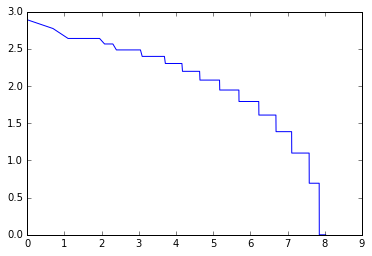


 {'alay': {2000: [0.093506118750335959, 0.064647275433856163, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.12781130925811027, nan, nan], 3000: [0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.075243143352601113, nan, nan, 0.068431850571794989, 0.06883906036347337, 0.087904985867617649], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324, 0.086311422804494969, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.075243143352601113, nan, nan, 0.054405054788021621, nan, nan, 0.11944614371477275, 0.071492875906702391, nan, 0.12781130925811027, nan, nan, 0.068431850571794989, 0.06883906036347337, 0.087904985867617649], 500: [0.064241639111353319, 0.066322173301021456, nan, 0.05060868376710307, 0.06746511179173

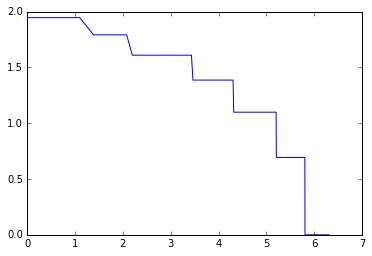


 {'alay': {2000: [0.093506118750335959, 0.064647275433856163, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.12781130925811027, nan, nan], 3000: [0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.075243143352601113, nan, nan, 0.068431850571794989, 0.06883906036347337, 0.087904985867617649], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324, 0.086311422804494969, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.075243143352601113, nan, nan, 0.054405054788021621, nan, nan, 0.11944614371477275, 0.071492875906702391, nan, 0.12781130925811027, nan, nan, 0.068431850571794989, 0.06883906036347337, 0.087904985867617649, 0.077700145630899164], 500: [0.064241639111353319, 0.066322173301021456, nan, 0.0506086837671

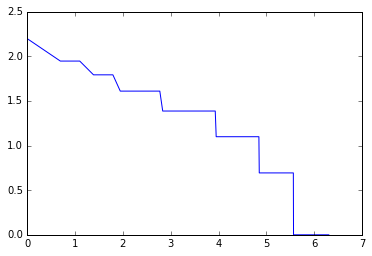


 {'alay': {2000: [0.093506118750335959, 0.064647275433856163, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.12781130925811027, nan, nan], 3000: [0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.075243143352601113, nan, nan, 0.068431850571794989, 0.06883906036347337, 0.087904985867617649], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324, 0.086311422804494969, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.075243143352601113, nan, nan, 0.054405054788021621, nan, nan, 0.11944614371477275, 0.071492875906702391, nan, 0.12781130925811027, nan, nan, 0.068431850571794989, 0.06883906036347337, 0.087904985867617649, 0.077700145630899164, nan], 500: [0.064241639111353319, 0.066322173301021456, nan, 0.05060868

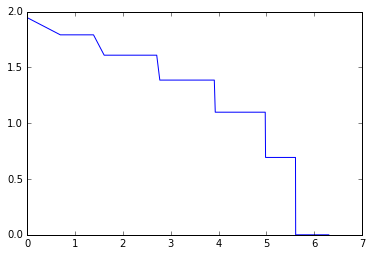


 {'alay': {2000: [0.093506118750335959, 0.064647275433856163, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.12781130925811027, nan, nan], 3000: [0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.075243143352601113, nan, nan, 0.068431850571794989, 0.06883906036347337, 0.087904985867617649], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324, 0.086311422804494969, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.075243143352601113, nan, nan, 0.054405054788021621, nan, nan, 0.11944614371477275, 0.071492875906702391, nan, 0.12781130925811027, nan, nan, 0.068431850571794989, 0.06883906036347337, 0.087904985867617649, 0.077700145630899164, nan, nan], 500: [0.064241639111353319, 0.066322173301021456, nan, 0.050

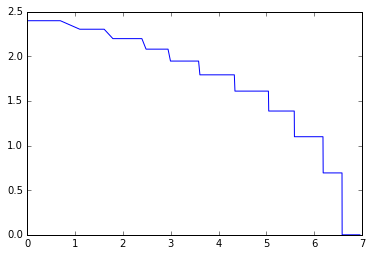


 {'alay': {2000: [0.093506118750335959, 0.064647275433856163, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.12781130925811027, nan, nan], 3000: [0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.075243143352601113, nan, nan, 0.068431850571794989, 0.06883906036347337, 0.087904985867617649], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324, 0.086311422804494969, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.075243143352601113, nan, nan, 0.054405054788021621, nan, nan, 0.11944614371477275, 0.071492875906702391, nan, 0.12781130925811027, nan, nan, 0.068431850571794989, 0.06883906036347337, 0.087904985867617649, 0.077700145630899164, nan, nan, 0.087855859634900557], 500: [0.064241639111353319, 0.06632217

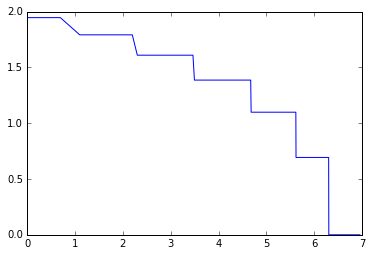


 {'alay': {2000: [0.093506118750335959, 0.064647275433856163, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.12781130925811027, nan, nan], 3000: [0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.075243143352601113, nan, nan, 0.068431850571794989, 0.06883906036347337, 0.087904985867617649], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324, 0.086311422804494969, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.075243143352601113, nan, nan, 0.054405054788021621, nan, nan, 0.11944614371477275, 0.071492875906702391, nan, 0.12781130925811027, nan, nan, 0.068431850571794989, 0.06883906036347337, 0.087904985867617649, 0.077700145630899164, nan, nan, 0.087855859634900557, 0.057467841272144812], 500: [0.06424163

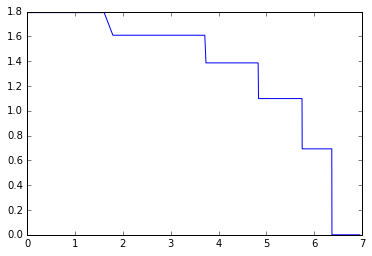


 {'alay': {2000: [0.093506118750335959, 0.064647275433856163, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.12781130925811027, nan, nan], 3000: [0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.075243143352601113, nan, nan, 0.068431850571794989, 0.06883906036347337, 0.087904985867617649], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324, 0.086311422804494969, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.075243143352601113, nan, nan, 0.054405054788021621, nan, nan, 0.11944614371477275, 0.071492875906702391, nan, 0.12781130925811027, nan, nan, 0.068431850571794989, 0.06883906036347337, 0.087904985867617649, 0.077700145630899164, nan, nan, 0.087855859634900557, 0.057467841272144812, nan], 500: [0.064

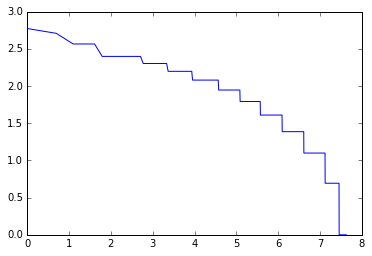


 {'alay': {2000: [0.093506118750335959, 0.064647275433856163, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.12781130925811027, nan, nan, 0.11929488989631266], 3000: [0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.075243143352601113, nan, nan, 0.068431850571794989, 0.06883906036347337, 0.087904985867617649], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324, 0.086311422804494969, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.075243143352601113, nan, nan, 0.054405054788021621, nan, nan, 0.11944614371477275, 0.071492875906702391, nan, 0.12781130925811027, nan, nan, 0.068431850571794989, 0.06883906036347337, 0.087904985867617649, 0.077700145630899164, nan, nan, 0.087855859634900557, 0.0574678412721448

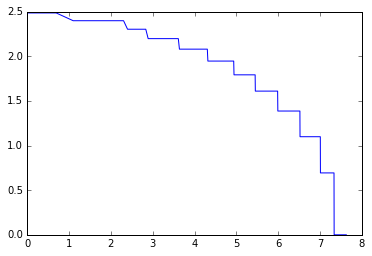


 {'alay': {2000: [0.093506118750335959, 0.064647275433856163, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.12781130925811027, nan, nan, 0.11929488989631266, 0.079673847796903396], 3000: [0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.075243143352601113, nan, nan, 0.068431850571794989, 0.06883906036347337, 0.087904985867617649], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324, 0.086311422804494969, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.075243143352601113, nan, nan, 0.054405054788021621, nan, nan, 0.11944614371477275, 0.071492875906702391, nan, 0.12781130925811027, nan, nan, 0.068431850571794989, 0.06883906036347337, 0.087904985867617649, 0.077700145630899164, nan, nan, 0.0878558596349005

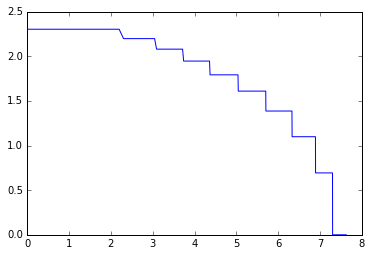


 {'alay': {2000: [0.093506118750335959, 0.064647275433856163, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.12781130925811027, nan, nan, 0.11929488989631266, 0.079673847796903396, nan], 3000: [0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.075243143352601113, nan, nan, 0.068431850571794989, 0.06883906036347337, 0.087904985867617649], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324, 0.086311422804494969, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.075243143352601113, nan, nan, 0.054405054788021621, nan, nan, 0.11944614371477275, 0.071492875906702391, nan, 0.12781130925811027, nan, nan, 0.068431850571794989, 0.06883906036347337, 0.087904985867617649, 0.077700145630899164, nan, nan, 0.08785585963

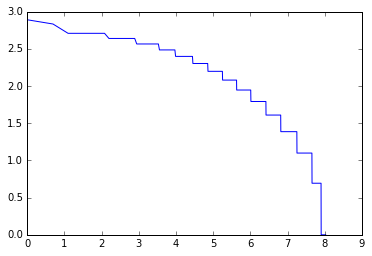


 {'alay': {2000: [0.093506118750335959, 0.064647275433856163, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.12781130925811027, nan, nan, 0.11929488989631266, 0.079673847796903396, nan], 3000: [0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.075243143352601113, nan, nan, 0.068431850571794989, 0.06883906036347337, 0.087904985867617649, 0.12347930043260691], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324, 0.086311422804494969, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.075243143352601113, nan, nan, 0.054405054788021621, nan, nan, 0.11944614371477275, 0.071492875906702391, nan, 0.12781130925811027, nan, nan, 0.068431850571794989, 0.06883906036347337, 0.087904985867617649, 0.077700145630899164, na

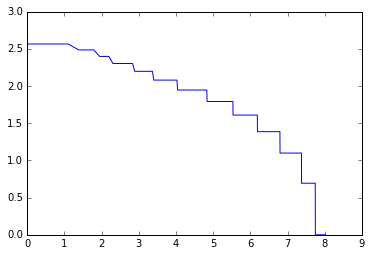


 {'alay': {2000: [0.093506118750335959, 0.064647275433856163, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.12781130925811027, nan, nan, 0.11929488989631266, 0.079673847796903396, nan], 3000: [0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.075243143352601113, nan, nan, 0.068431850571794989, 0.06883906036347337, 0.087904985867617649, 0.12347930043260691, nan], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324, 0.086311422804494969, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.075243143352601113, nan, nan, 0.054405054788021621, nan, nan, 0.11944614371477275, 0.071492875906702391, nan, 0.12781130925811027, nan, nan, 0.068431850571794989, 0.06883906036347337, 0.087904985867617649, 0.07770014563089916

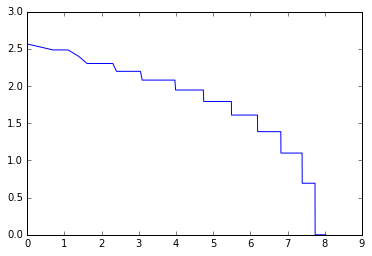


 {'alay': {2000: [0.093506118750335959, 0.064647275433856163, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.12781130925811027, nan, nan, 0.11929488989631266, 0.079673847796903396, nan], 3000: [0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.075243143352601113, nan, nan, 0.068431850571794989, 0.06883906036347337, 0.087904985867617649, 0.12347930043260691, nan, nan], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324, 0.086311422804494969, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.075243143352601113, nan, nan, 0.054405054788021621, nan, nan, 0.11944614371477275, 0.071492875906702391, nan, 0.12781130925811027, nan, nan, 0.068431850571794989, 0.06883906036347337, 0.087904985867617649, 0.077700145630

In [5]:
ChiLaw = {}
Exp = {}

NodeList=[500,1000,2000,3000]
FBlist=[5]
VBlist=[10]
LayerList=[4,8,12]
InfluDist=[0.2]

ChiLaw['proj'] = {k:[] for k in NodeList+FBlist+VBlist+LayerList+InfluDist}
ChiLaw['alay'] = {k:[] for k in NodeList+FBlist+VBlist+LayerList+InfluDist}
Exp['proj'] = {k:[] for k in NodeList+FBlist+VBlist+LayerList+InfluDist}
Exp['alay'] = {k:[] for k in NodeList+FBlist+VBlist+LayerList+InfluDist}

print('\n', ChiLaw)
    
for rep in range(4):
    print('\n Repetition',rep)
    
    for NodesA in NodeList:
        for FB in FBlist:
            for VB in VBlist:
                for LayerA in LayerList:
                    for InDi in InfluDist:
                        
                        #yeah
                        print('\n Setup',NodesA,FB,VB,LayerA,InDi)

                        MG = nx.MultiGraph()
                        TheTime = 0
                        RndFr=3
                        Nodes=50 #core set of 50 nodes
                        Iter=3
                        LayerC=2 #core layers
                        bd=0.05 #abstension strip
                        issue=np.random.random(FB+VB) #voting issue
                        Keys = [NodesA, FB, VB, LayerA, InDi]
                        print(' Time ', TheTime)


                        fbdist, fbpos, vbdist, vbpos, cbpos = [], [], [], [], []
                        for j in range(LayerA): #creates random vector in specified range
                            fbpos.append(list(np.random.randint(FB, size=np.random.randint(1,FB))))
                            fbdist.append(0.50*np.random.random()+0.2)
                        for j in range(LayerA): #creates random vector in specified range
                            vbpos.append(list(np.random.randint(VB, size=np.random.randint(1,VB))))
                            vbdist.append(0.50*np.random.random()+0.2)
                            cbpos.append(list(np.random.randint(VB, size=np.random.randint(1,VB))))
                        print('\n',fbdist,'\n',fbpos,'\n',vbdist,'\n',vbpos,'\n',cbpos)

                        Core(MG, Nodes, NodesA, FB, VB, RndFr, fbpos, fbdist,vbpos, vbdist, LayerA, LayerC, TheTime)
                        Grow(MG, Nodes, NodesA, FB, VB, RndFr, fbpos, fbdist,vbpos, vbdist, LayerA, LayerC, TheTime)
                        print(Rand(MG, Nodes, NodesA, FB, VB, RndFr, fbpos, fbdist,vbpos, vbdist, LayerA, LayerC, TheTime))

                        print(TheTime)

                        #AllVoteA(MG, issue)

                        BaseAnalisys(MG,LayerA)
                        
                        ydata=sorted(nx.degree(MG).values(),reverse=True)
                        #print(ydata)
                        '''
                        bins=60
                        Max=max(ydata)
                        Min=min(ydata)
                        Span = Max - Min
                        Size = Span/bins
                        #print('span',Span,'size',Size,'bins',bins,'min-max', Min,Max)#-------------------
                        yHist=[]
                        for i in range(bins+1):
                            yHist.append(0)
                        for i in ydata:
                            pos = int((i-Min)//Size)
                            if i-Min >= Size*pos and i-Min <= Size*(pos+1):
                                yHist[pos]=yHist[pos]+1
                            else:
                                print('error y ',i)#------------------- 
                        print('histdata',yHist)
                        '''
                        xdata=[]
                        for i in range(len(ydata)):
                            xdata.append(i+1)
                        logx = np.log(xdata)
                        logy = np.log(ydata)
                        #print('logdata:',logx, logy)
                        fitfunc = numpy.polyfit(logx, logy, 1)
                        print('param:',fitfunc)
                        for key in Keys:
                            Exp['proj'][key].append(fitfunc[0])
                        f_obs=logy
                        f_exp=[]
                        for x in logx:
                            f_exp.append(fitfunc[0]*x+fitfunc[1])
                        chisq=stats.chisquare(f_obs, f_exp, ddof=(len(ydata)-1), axis=0)
                        #print('\n',f_obs,'\n',f_exp)
                        print('\n chisq',chisq[0], chisq[1])
                        for key in Keys:
                            ChiLaw['proj'][key].append(chisq[0]/(len(ydata)-1)) 
                        plt.plot(logx,logy)
                        plt.show()
                        #-----------------------------------------average for layers
                        t0, t1 = [], []
                        for layer in range(LayerA):
                            G = ExtractLayer(MG, layer)
                            ydata=sorted(nx.degree(G).values(),reverse=True)
                            xdata=[]
                            for i in range(len(ydata)):
                                xdata.append(i+1)
                            logx = np.log(xdata)
                            logy = np.log(ydata)
                            fitfunc = numpy.polyfit(logx, logy, 1)
                            f_obs=logy
                            f_exp=[]
                            for x in logx:
                                f_exp.append(fitfunc[0]*x+fitfunc[1])
                            t0.append((stats.chisquare(f_obs, f_exp, ddof=(len(ydata)-1), axis=0)[0])/(len(ydata)-1))
                            t1.append(fitfunc[0])
                        for key in Keys:
                            Exp['alay'][key].append(np.mean(t1))
                            ChiLaw['alay'][key].append(np.mean(t0))
                        del t0, t1
                        #-----------------------------------------end    
                        
                        MG.clear()
                        print('\n',ChiLaw,'\n',Exp,'\n------------------------------------------')
                        
                        
    with open('PLTAFF.pickle', 'wb') as handle:
        pickle.dump(ChiLaw, handle, protocol=pickle.HIGHEST_PROTOCOL)


In [6]:
print('\n',ChiLaw)
print('\n', Exp)


 {'alay': {2000: [0.093506118750335959, 0.064647275433856163, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.12781130925811027, nan, nan, 0.11929488989631266, 0.079673847796903396, nan], 3000: [0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.075243143352601113, nan, nan, 0.068431850571794989, 0.06883906036347337, 0.087904985867617649, 0.12347930043260691, nan, nan], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324, 0.086311422804494969, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.075243143352601113, nan, nan, 0.054405054788021621, nan, nan, 0.11944614371477275, 0.071492875906702391, nan, 0.12781130925811027, nan, nan, 0.068431850571794989, 0.06883906036347337, 0.087904985867617649, 0.077700145630

In [7]:
#VoteAnalysis(MG, issue, bd,1)
#VoteALayerLight(MG, issue, bd, 0, LayerA)

In [8]:
#PollLayers(MG, 100, 100, bd, issue, 1, 2, 1)

In [9]:
#PlotLayer(MG,LayerA)


 Exp alay Nodes 

value 500 , average -0.265269689036 , st dev 0.0462631226465
value 1000 , average -0.325087662384 , st dev 0.0591782736797
value 2000 , average -0.344992830498 , st dev 0.0664503731096
value 3000 , average -0.342608168031 , st dev 0.0487051876918


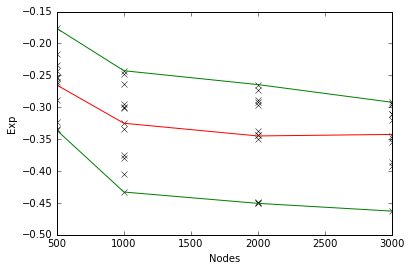


 Exp alay Layers 

value 4 , average -0.364451389166 , st dev 0.0707852642097
value 8 , average -0.295457510618 , st dev 0.0432666882966
value 12 , average -0.298559862678 , st dev 0.0501990172852


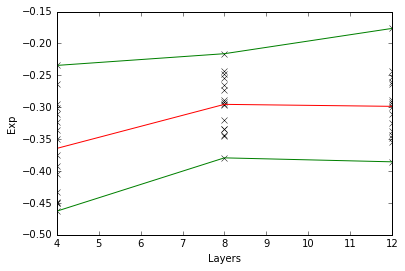


 Exp proj Nodes 

value 500 , average -0.507449540333 , st dev 0.0309977698282
value 1000 , average -0.552125775177 , st dev 0.0472955424676
value 2000 , average -0.541733628566 , st dev 0.0417579818189
value 3000 , average -0.525057393268 , st dev 0.0314981473273


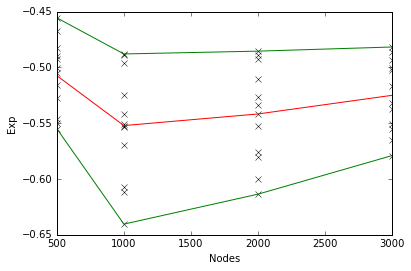


 Exp proj Layers 

value 4 , average -0.520207171309 , st dev 0.0362670659857
value 8 , average -0.529506951293 , st dev 0.0395447192876
value 12 , average -0.545060630407 , st dev 0.04602477206


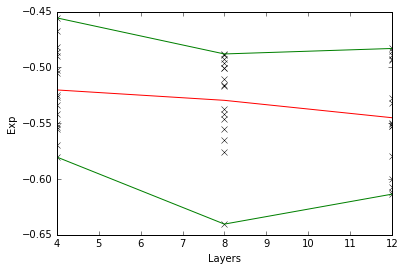


 ChiLaw alay Nodes 

value 500 , average 0.0634571347317 , st dev 0.00889544805139
value 1000 , average 0.087996526301 , st dev 0.0184881879092
value 2000 , average 0.0905842989491 , st dev 0.0247791286426
value 3000 , average 0.0827830532165 , st dev 0.0177841741006


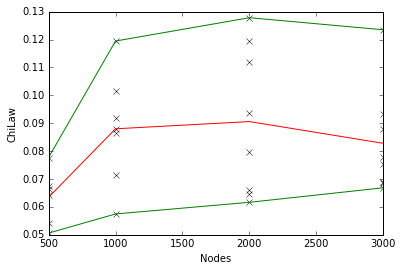


 ChiLaw alay Layers 

value 4 , average 0.0913102695169 , st dev 0.0239989183974
value 8 , average 0.0690721733236 , st dev 0.00799963004715
value 12 , average 0.0773237547722 , st dev 0.00894403985591


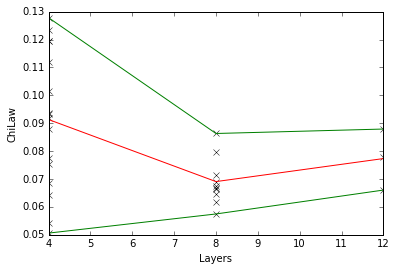


 ChiLaw proj Nodes 

value 500 , average 0.13178257934 , st dev 0.01705361042
value 1000 , average 0.147064396749 , st dev 0.00745574970828
value 2000 , average 0.14007198962 , st dev 0.0153495404461
value 3000 , average 0.140493713103 , st dev 0.0139967238309


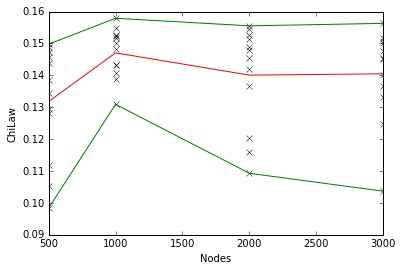


 ChiLaw proj Layers 

value 4 , average 0.132068263304 , st dev 0.019052513872
value 8 , average 0.144346354317 , st dev 0.0108855424064
value 12 , average 0.143144891488 , st dev 0.00992579729622


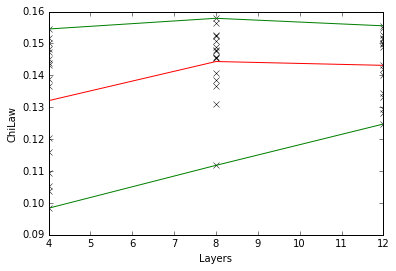

In [12]:
funname = ['Exp','ChiLaw']
dictionary = [Exp, ChiLaw]
#n=0
setting = ['alay','proj']
#m=1
varname = ['Nodes','Layers']
varlist = [NodeList, LayerList]
#o=1

for n in range(len(dictionary)):
    for m in range(len(setting)):
        for o in range(len(varlist)):

            temp0 = []
            temp1 = []
            temp2 = []
            temp3 = []
            print('\n', funname[n], setting[m], varname[o],'\n')

            for j in varlist[o]:
                #print(j)
                temp0.append(dictionary[n][setting[m]][j])
                temp1.append(np.nanmean(dictionary[n][setting[m]][j]))
                temp2.append(np.nanmax(dictionary[n][setting[m]][j]))
                temp3.append(np.nanmin(dictionary[n][setting[m]][j]))

                print('value',j,', average',np.nanmean(dictionary[n][setting[m]][j]),', st dev',np.nanstd(dictionary[n][setting[m]][j]))

            plt.plot(varlist[o],temp0, 'kx')
            plt.plot(varlist[o],temp1, 'r-')
            plt.plot(varlist[o],temp2, 'g-')
            plt.plot(varlist[o],temp3, 'g-')
            plt.ylabel(funname[n])
            plt.xlabel(varname[o])
            plt.savefig('PLTAFF'+funname[n]+setting[m]+varname[o]+'.png',orientation='landscape',bbox_inches='tight',dpi='figure')
            plt.show()


In [13]:
with open('PLTAFF.pickle', 'rb') as handle:
    ChiLaw = pickle.load(handle)

In [14]:
print(ChiLaw)

{'alay': {2000: [0.093506118750335959, 0.064647275433856163, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.12781130925811027, nan, nan, 0.11929488989631266, 0.079673847796903396, nan], 0.2: [0.064241639111353319, 0.066322173301021456, nan, 0.091965000511249603, nan, nan, 0.093506118750335959, 0.064647275433856163, nan, 0.093475461226274259, 0.066855657072268107, 0.078034966845598616, 0.05060868376710307, 0.067465111791736421, nan, 0.10143654026268324, 0.086311422804494969, nan, 0.11206317136124136, 0.061646467492994725, 0.066031311603240758, 0.075243143352601113, nan, nan, 0.054405054788021621, nan, nan, 0.11944614371477275, 0.071492875906702391, nan, 0.12781130925811027, nan, nan, 0.068431850571794989, 0.06883906036347337, 0.087904985867617649, 0.077700145630899164, nan, nan, 0.087855859634900557, 0.057467841272144812, nan, 0.11929488989631266, 0.079673847796903396, nan, 0.12347930043260691, nan, nan], 500: [0.064241639111353319, 0.066322173301021456, nan, 0.